## PS5: Markov Decision Processes and Value Iteration

### Markov Decision Processes (MDPs)
In an MDP, an agent receives a reward or penalty for each decision. MDPs consist of the tuple $\left(\mathcal{S}, \mathcal{A}, R_{a}\left(s, s^{\prime}\right), T_{a}\left(s,s^{\prime}\right), \gamma\right)$:

* The state space $\mathcal{S}$ is the set of all possible states $s$ that a system can exist in.
* The action space $\mathcal{A}$ is the set of all possible actions $a$ that are available to the agent, where $\mathcal{A}_{s} \subseteq \mathcal{A}$ is the subset of the action space $\mathcal{A}$ that is accessible from state $s$.
* An reward $R_{a}\left(s, s^{\prime}\right)$ is received after transitioning from $s\rightarrow{s}^{\prime}$ due to action $a$. 
* The state transition model $T_{a}\left(s,s^{\prime}\right) = P(s_{t+1} = s^{\prime}~|~s_{t}=s,a_{t} = a)$ denotes the probability that action $a$ in state $s$ at time $t$ will result in state $s^{\prime}$ at time $t+1$
* The quantity $\gamma$ is a discount factor used to weigh the future expected utility.

Finally, a policy function $\pi$ is the mapping from states $s\in\mathcal{S}$ to actions $a\in\mathcal{A}$ used by the agent to solve a decision task, i.e., $\pi(s) = a$.

### Value Iteration
_Value iteration_ iteratively computes the optimal value function $U^{*}(s)$ using the _Bellman backup_ operation:

$$
\begin{equation*}
U_{k+1}(s) = \underset{a\in\mathcal{A}}{\max}\left(R(s,a) + \gamma\cdot\sum_{s^{\prime}\in\mathcal{S}}T(s^{\prime}\,\vert\,s,a)\cdot{U}_{k}(s^{\prime})\right)
\end{equation*}
$$

As $k\rightarrow\infty$ the value function $U_{k}(s)$ converges to the optimal value function $U^{\star}(s)$. The optimal policy $\pi^{\star}(s)$ can be extracted from the $Q(s,a)$-function:

$$
\begin{equation*}
Q^{\star}(s,a) = R(s,a) + \gamma\times{\text{sum}([T(s,s^{\prime},a)\times{U^{\star}}(s^{\prime})\,\,\text{for}\,s^{\prime} \in\mathcal{S}])}
\end{equation*}
$$

by selecting the action $a$ such that:

$$
\begin{equation*}
\pi^{\star}(s) = \underset{a\in\mathcal{A}}{\arg\max}\,Q^{\star}(s,a)
\end{equation*}
$$

### Problem and learning objectives
You have a [roomba](https://www.irobot.com) that has finished cleaning the kitchen floor and needs to return to its charging station. However, between your kitchen floor and the `charging station` (safety), there are one or more `lava pits` (destruction for the [roomba](https://www.irobot.com)). This is an example of a two-dimensional grid-world navigational decision task. 

`PS5` will familiarize students with using `value iteration` for solving a two-dimensional grid-world navigation task, the role of the discount factor $\gamma$, and the number of iterations $k_{\text{max}}$. In particular, we will:

* __Task 1__: Setup a $10\times{10}$ grid, encoded this model as an instance of the `MyRectangularGridWorldModel` type
    * `TODO`: Inspect the data inside our grid world model and understand what each describes (similar to `Lab 9c`, just bigger).
    * `TODO`: Add `lava pits` at $(5,5)$, $(6,5)$ and $(6,6)$.
    * `TODO`: Add a `charging station` at $(5,6)$.
* __Task 2__: Use our `MyRectangularGridWorldModel` instance and generate the components of the `MDP`, namely, the return function (or array) `R(s, a)`, and the model of the physics of the world in the transition function (or array) `T(s, s′, a)`.
    * `TODO`: Modify the $R(s, a)$ function so that it describes a `soft wall` at $(2,2)$ and $(2,3)$, i.e., a region where the [roomba](https://www.irobot.com) is _discouraged_ from going. Set the wall penalty as `-1000`. 
* __Task 3__: For $\gamma = 0.1,0.5,0.95\times{k}_{\max}=10,100,1000$ use `value iteration` to estimate the optimal value function $U^{\star}(s)$. 
    * `TODO`: For each combination of ($\gamma$,$k_{\max}$), extract the `action-value function` or $Q(s, a)$ from the optimal optimal value function $U^{\star}(s)$, and compute the optimal navigation policy $\pi^{\star}(s)$ from $Q(s,a)$
        * Store the policy $\pi^{\star}(s)$ in a `Dictionary` where the `keys` are the combinations of ($\gamma$,$k_{\max}$) and the `values` are the optimal policy $\pi^{\star}(s)$.
    * `TODO`: Develop an approach to visualize an optimal policy and explore the policies for different parameter combinations.

## Setup
The computations in this lab (or example) are enabled by the [VLDecisionsPackage.jl](https://github.com/varnerlab/VLDecisionsPackage.jl.git) and several external `Julia` packages. To load the required packages and any custom codes the teaching team has developed to work with these packages, we [include](https://docs.julialang.org/en/v1/manual/code-loading/) the `Include.jl` file):

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLDecisionsPackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/PS5-CHEME-5760-LavaWorld-Fall-2023/Project.toml`
  No Changes to `~/Desktop/julia_work/PS5-CHEME-5760-LavaWorld-Fall-2023/Manifest.toml`
Precompiling project...
  ✓ Latexify → DataFramesExt
  ✓ Plots
  ✓ Plots → FileIOExt
  ✓ Plots → UnitfulExt
  ✓ StatsPlots
  ✓ VLDecisionsPackage
  6 dependencies successfully precompiled in 44 seconds. 256 already precompiled.
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
    Updating `~/Desktop/julia_work/PS5-CHEME-5760-LavaWorld-Fall-2023/Project.toml`
  [4119e0bf] ~ VLQuantitativeFinancePackage v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main` ⇒ v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main`
    Updating `~/Desktop/julia_work/PS5-CHEME-5760-LavaWorld-Fall-20

### Types

We model the grid world using the `MyRectangularGridWorldModel` type. 
* We pass the number of rows in the `nrows::Int` field, the number of columns in the `ncols::Int` field, and an approximate representation of the problem rewards in the `rewards::Dict{Tuple{Int,Int}, Float64}` field. The other fields are then populated during the `build(...)` process:

```julia
mutable struct MyRectangularGridWorldModel <: AbstractWorldModel

    # data -
    number_of_rows::Int
    number_of_cols::Int
    coordinates::Dict{Int,Tuple{Int,Int}}
    states::Dict{Tuple{Int,Int},Int}
    moves::Dict{Int,Tuple{Int,Int}}
    rewards::Dict{Int,Float64}

    # constructor -
    MyRectangularGridWorldModel() = new();
end
```

The `MyMDPProblemModel` type models a Markov Decision Process (MDPs). 
* We pass the states `𝒮`, the actions `𝒜`, the transition matrix `T`, the reward matrix `R`, and the discount factor `γ` into the `build(...)` method. 

```julia
mutable struct MyMDPProblemModel <: AbstractProcessModel

    # data -
    𝒮::Array{Int64,1}
    𝒜::Array{Int64,1}
    T::Union{Function, Array{Float64,3}}
    R::Union{Function, Array{Float64,2}}
    γ::Float64
    
    # constructor -
    MyMDPProblemModel() = new()
end
```

## Task 1: Build the world model
We encoded the `rectangular grid world` using the `MyRectangularGridWorldModel` model, which we construct using a `build(...)` method. Let's setup the data for the world, setup the states, actions, rewards and then construct the world model. 
* First, set values for the `number_of_rows` and `number_of_cols` variables, the `nactions` that are avialble to the agent and the `discount factor` $\gamma$. 
* Then, we'll compute the number of states, and setup the state set $\mathcal{S}$ and the action set $\mathcal{A}$

In [2]:
number_of_rows = 10
number_of_cols = 10
nactions = 4;
nstates = (number_of_rows*number_of_cols);
𝒮 = range(1,stop=nstates,step=1) |> collect;
𝒜 = range(1,stop=nactions,step=1) |> collect;
γ = 0.95;

Next, we'll set up a description of the rewards, the `rewards::Dict{Tuple{Int,Int}, Float64}` dictionary, which maps the $(x,y)$-coordinates to a reward value. We only need to put `non-default` reward values in the reward dictionary (we'll add default values to the other locations later). Lastly, let's put the locations on the grid that are `absorbing`, meaning the charging station or lava pits in your living room:

In [3]:
# TODO: MODIFY THIS CODE

lava_reward = -100000.0;
charging_reward = 10000.0;

# setup rewards -
rewards = Dict{Tuple{Int,Int}, Float64}()
rewards[(5,5)] =  lava_reward # lava in the (5,5) square 
rewards[(6,5)] = lava_reward # lava in the (6,5) square
rewards[(6,6)] = lava_reward # lava in the (6,6) square
rewards[(5,6)] = charging_reward    # charging station square

# setup set of absorbing states -
absorbing_state_set = Set{Tuple{Int,Int}}()
push!(absorbing_state_set, (5,5));
push!(absorbing_state_set, (6,5));
push!(absorbing_state_set, (6,6));
push!(absorbing_state_set, (5,6));

Finally, we can build an instance of the `MyRectangularGridWorldModel` type, which models the grid world. We save this instance in the `world` variable
* We must pass in the number of rows `nrows`, number of cols `ncols`, and our initial reward description in the `rewards` field into the `build(...)` method

In [4]:
world = VLDecisionsPackage.build(MyRectangularGridWorldModel, 
    (nrows = number_of_rows, ncols = number_of_cols, rewards = rewards));

#### Questions
* `TODO`: Inspect the data inside our grid world model, understand what each describes

In [5]:
fieldnames(MyRectangularGridWorldModel)

(:number_of_rows, :number_of_cols, :coordinates, :states, :moves, :rewards)

In [6]:
world.rewards

Dict{Int64, Float64} with 100 entries:
  5  => -1.0
  56 => -100000.0
  35 => -1.0
  55 => -100000.0
  60 => -1.0
  30 => -1.0
  32 => -1.0
  6  => -1.0
  67 => -1.0
  45 => -100000.0
  73 => -1.0
  64 => -1.0
  90 => -1.0
  4  => -1.0
  13 => -1.0
  54 => -1.0
  63 => -1.0
  86 => -1.0
  91 => -1.0
  62 => -1.0
  58 => -1.0
  52 => -1.0
  12 => -1.0
  28 => -1.0
  75 => -1.0
  ⋮  => ⋮

## Task 2: Generate the components of the MDP problem
The MDP problem requires the return function (or array) `R(s, a)`, and the transition function (or array) `T(s, s′, a)`. Let's construct these from our grid world model instance, starting with the reward function `R(s, a)`:

### Rewards $R(s,a)$
We'll encode the reward function as a $\dim\mathcal{S}\times\dim\mathcal{A}$ array, which holds the reward values for being in state $s\in\mathcal{S}$ and taking action $a\in\mathcal{A}$. After initializing the `R`-array and filling it with zeros, we'll populate the non-zero values of $R(s, a)$ using nested `for` loops. During each iteration of the `outer` loop, we'll:
* Select a state `s`, an action `a`, and a move `Δ`
* We'll then compute the new position resulting from implementing action `a` from the current position and store this in the `new_position` variable. * If the `new_position`$\in\mathcal{S}$ is in our initial `rewards` dictionary (the charging station or a lava pit), we use that reward value from the `rewards` dictionary. If we are still in the world but not in a special location, we set the reward to `-1`.
* Finally, if `new_position`$\notin\mathcal{S}$, i.e., the `new_position` is a space outside the grid, we set a penalty of `-50000.0`.

In [7]:
R = zeros(nstates, nactions);
fill!(R, 0.0)
for s ∈ 𝒮
    for a ∈ 𝒜
        
        Δ = world.moves[a];
        current_position = world.coordinates[s]
        new_position =  current_position .+ Δ
        if (haskey(world.states, new_position) == true)
            if (haskey(rewards, new_position) == true)
                R[s,a] = rewards[new_position];
            else
                R[s,a] = -1.0;
            end
        else
            R[s,a] = -50000.0; # we are off the grid, big negative penalty
        end
    end
end

# TODO: Modify R to incldue the soft walls
soft_wall_set = Set{Tuple{Int,Int}}();
push!(soft_wall_set, (2,1));
push!(soft_wall_set, (2,2));
push!(soft_wall_set, (2,3));
push!(soft_wall_set, (7,4));
for s ∈ 𝒮
    
    current_position = world.coordinates[s]
    for a ∈ 𝒜
        Δ = world.moves[a];
        new_position =  current_position .+ Δ
        
        if (in(new_position, soft_wall_set) == true)
          R[s,a] = -1000.0  
        end
    end
end

In [8]:
world.states

Dict{Tuple{Int64, Int64}, Int64} with 100 entries:
  (7, 1)   => 61
  (4, 6)   => 36
  (5, 5)   => 45
  (9, 3)   => 83
  (7, 8)   => 68
  (7, 10)  => 70
  (9, 4)   => 84
  (8, 9)   => 79
  (7, 2)   => 62
  (4, 7)   => 37
  (1, 9)   => 9
  (2, 1)   => 11
  (10, 1)  => 91
  (6, 5)   => 55
  (2, 8)   => 18
  (10, 8)  => 98
  (2, 10)  => 20
  (10, 10) => 100
  (2, 2)   => 12
  (3, 9)   => 29
  (10, 2)  => 92
  (7, 6)   => 66
  (9, 1)   => 81
  (4, 5)   => 35
  (8, 3)   => 73
  ⋮        => ⋮

#### Check: Do your entries of `R` make sense to you?
Go through your entries in `R`, and check is the `soft wall` is implemented correctly.

### Transition $T(s, s^{\prime},a)$
Next, build the transition function $T(s,s^{\prime},a)$. We'll encode this as a $\dim\mathcal{S}\times\dim\mathcal{S}\times\dim\mathcal{A}$ [multidimension array](https://docs.julialang.org/en/v1/manual/arrays/) and populate it using nested `for` loops. 

* The `outer` loop we will iterate over actions. For every $a\in\mathcal{A}$ will get the move associated with that action and store it in the `Δ`
* In the `inner` loop, we will iterate over states $s\in\mathcal{S}$. We compute a `new_position` resulting from implementing action $a$ and check if `new_position`$\in\mathcal{S}$. If `new_position` is in the world, and `current_position` is _not_ an `absorbing state` we set $s^{\prime}\leftarrow$`world.states[new_position]`, and `T[s, s′,  a] = 1.0`
* However, if the `new_position` is outside of the grid (or we are jumping from an `absorbing` state), we set `T[s, s,  a] = 1.0`, i.e., the probability that we stay in `s` if we take action `a` is `1.0`.

In [9]:
T = Array{Float64,3}(undef, nstates, nstates, nactions);
fill!(T, 0.0)
for a ∈ 𝒜
    
    Δ = world.moves[a];
    
    for s ∈ 𝒮
        current_position = world.coordinates[s]
        new_position =  current_position .+ Δ
        if (haskey(world.states, new_position) == true && 
                in(current_position, absorbing_state_set) == false)
            s′ = world.states[new_position];
            T[s, s′,  a] = 1.0
        else
            T[s, s,  a] = 1.0
        end
    end
end

## Task 3: Estimate the optimal value function $U^{\star}(s)$ for combinations of $(\gamma,k_{\max})$
For each combination of $\gamma = 0.1,0.5,0.95\times{k}_{\max}=10,100,1000$ use `value iteration` to estimate the optimal value function $U^{\star}(s)$. 
* `TODO`: For each combination of ($\gamma$,$k_{\max}$), extract the `action-value function` or $Q(s, a)$ from the optimal value function $U^{\star}(s)$, and compute the optimal navigation policy $\pi^{\star}(s)$ from $Q(s,a)$
    * Store the optimal policy $\pi^{\star}(s)$ in a `Dictionary` where the `keys` are the combinations of ($\gamma$,$k_{\max}$) and the `values` are the optimal policy $\pi^{\star}(s)$.
* `TODO`: Develop an approach to visualize an optimal policy (similar to `Lab 9c` is fine). 
    * Are the policies different for different parameter combinations, or is our `value iteration` algorithm robust to the parameter choice?

In [10]:
# TODO: Complete this implementation
policy_dictionary = Dict{Tuple{Float64,Int64}, Vector{Int64}}()
γ_array = [0.1,0.5,0.95];
k_array = [1,10,100,1000];
for i ∈ eachindex(γ_array)
    
    γ = γ_array[i];
    
    # ok, so we have a γ, create a new MDP model with this γ
    m = VLDecisionsPackage.build(MyMDPProblemModel, (𝒮 = 𝒮, 𝒜 = 𝒜, T = T, R = R, γ = γ));
    
    for j ∈ eachindex(k_array)
        k_max = k_array[j];
        
        # compute
        value_iteration_model = MyValueIterationModel(k_max);
        solution = VLDecisionsPackage.solve(value_iteration_model, m);
        my_Q = Q(m, solution.U)
        my_π = policy(my_Q);
        
        # store -
        policy_dictionary[(γ,k_max)] = my_π;
    end
end

In [11]:
## Visualize ...
policy_dictionary

Dict{Tuple{Float64, Int64}, Vector{Int64}} with 12 entries:
  (0.1, 100)   => [4, 4, 4, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, …
  (0.5, 1)     => [4, 3, 3, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, …
  (0.5, 1000)  => [4, 4, 4, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, …
  (0.1, 1)     => [4, 3, 3, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, …
  (0.1, 1000)  => [4, 4, 4, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, …
  (0.5, 10)    => [4, 4, 4, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, …
  (0.95, 100)  => [4, 4, 4, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, …
  (0.1, 10)    => [4, 4, 4, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, …
  (0.95, 1)    => [4, 3, 3, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, …
  (0.95, 1000) => [4, 4, 4, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, …
  (0.95, 10)   => [4, 4, 4, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, …
  (0.5, 100)   => [4, 4, 4, 2, 2, 2, 2, 2, 2, 2  

In [12]:
move_arrows = Dict{Int,Any}();
move_arrows[1] = "←"
move_arrows[2] = "→"
move_arrows[3] = "↓"
move_arrows[4] = "↑"
move_arrows[5] = "∅";

In [13]:
my_π = policy_dictionary[(0.1,10)];

In [14]:
for s ∈ 𝒮
    
    a = my_π[s];
    Δ = world.moves[a];
    current_position = world.coordinates[s]
    new_position =  current_position .+ Δ
    
    if (in(current_position, absorbing_state_set) == true)
        println("$(current_position) $(move_arrows[5])")
    else
        println("$(current_position) $(move_arrows[a]) $(new_position)")
    end
end

(1, 1) ↑ (1, 2)
(1, 2) ↑ (1, 3)
(1, 3) ↑ (1, 4)
(1, 4) → (2, 4)
(1, 5) → (2, 5)
(1, 6) → (2, 6)
(1, 7) → (2, 7)
(1, 8) → (2, 8)
(1, 9) → (2, 9)
(1, 10) → (2, 10)
(2, 1) → (3, 1)
(2, 2) → (3, 2)
(2, 3) → (3, 3)
(2, 4) → (3, 4)
(2, 5) → (3, 5)
(2, 6) → (3, 6)
(2, 7) → (3, 7)
(2, 8) → (3, 8)
(2, 9) → (3, 9)
(2, 10) → (3, 10)
(3, 1) → (4, 1)
(3, 2) → (4, 2)
(3, 3) → (4, 3)
(3, 4) → (4, 4)
(3, 5) → (4, 5)
(3, 6) → (4, 6)
(3, 7) → (4, 7)
(3, 8) → (4, 8)
(3, 9) → (4, 9)
(3, 10) → (4, 10)
(4, 1) ↑ (4, 2)
(4, 2) ↑ (4, 3)
(4, 3) ↑ (4, 4)
(4, 4) ↑ (4, 5)
(4, 5) ↑ (4, 6)
(4, 6) → (5, 6)
(4, 7) → (5, 7)
(4, 8) → (5, 8)
(4, 9) → (5, 9)
(4, 10) → (5, 10)
(5, 1) ← (4, 1)
(5, 2) ← (4, 2)
(5, 3) ← (4, 3)
(5, 4) ← (4, 4)
(5, 5) ∅
(5, 6) ∅
(5, 7) ↓ (5, 6)
(5, 8) ↓ (5, 7)
(5, 9) ↓ (5, 8)
(5, 10) ↓ (5, 9)
(6, 1) ← (5, 1)
(6, 2) ← (5, 2)
(6, 3) ← (5, 3)
(6, 4) ← (5, 4)
(6, 5) ∅
(6, 6) ∅
(6, 7) ← (5, 7)
(6, 8) ← (5, 8)
(6, 9) ← (5, 9)
(6, 10) ← (5, 10)
(7, 1) ← (6, 1)
(7, 2) ← (6, 2)
(7, 3) ← (6, 3)
(7, 4) ← 

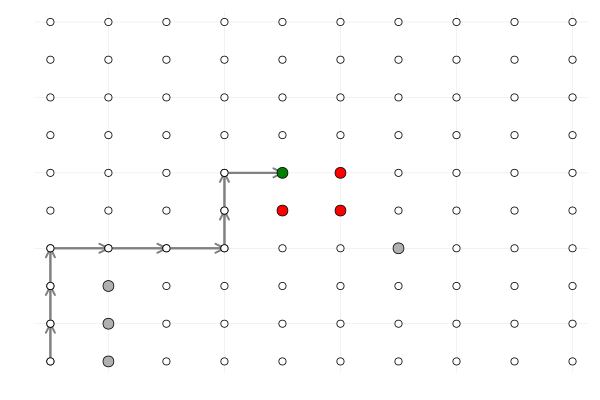

In [15]:

# setup -
# draw the path -
p = plot();
initial_site = (1,1)
hit_absorbing_state = false
s = world.states[initial_site];
visited_sites = Set{Tuple{Int,Int}}();
push!(visited_sites, initial_site);

while (hit_absorbing_state == false)
    current_position = world.coordinates[s]
    a = my_π[s];
    Δ = world.moves[a];
    new_position =  current_position .+ Δ
    scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, msc=:black, c=:blue)
    plot!([current_position[1], new_position[1]],[current_position[2],new_position[2]], label="", arrow=true, lw=2, c=:gray)
    
    if (in(new_position, absorbing_state_set) == true || in(new_position, visited_sites) == true)
        hit_absorbing_state = true;
    else
        s = world.states[new_position];
        push!(visited_sites, new_position);
    end
end

# draw the grid -
for s ∈ 𝒮
    current_position = world.coordinates[s]
    a = my_π[s];
    Δ = world.moves[a];
    new_position =  current_position .+ Δ
    
    if (haskey(rewards, current_position) == true && rewards[current_position] == charging_reward)
        scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:green, ms=6)
    elseif (haskey(rewards, current_position) == true && rewards[current_position] == lava_reward)
        scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:red, ms=6)
    elseif (in(current_position, soft_wall_set) == true)
        scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:gray69, ms=6)
    else
        scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, msc=:black, c=:white)
    end
end
current()

In [16]:
2

2

In [17]:
function test()
    println("Test")
end

test (generic function with 1 method)

In [18]:
test()

Test
